In [76]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier

In [77]:
train_df = pd.read_csv('train_df2.csv', index_col=0)
train_df.drop(['star_rating', 'pos_corpus', 'neg_corpus', 'pos_1', 'pos_2', 'pos_3', 
               'neg_1', 'neg_2', 'neg_3', 'prod_corpus', 'word_1', 'word_2', 'word_3'], axis=1, inplace=True)
train_df.drop(['cust_total_votes_mean', 'cust_total_votes_std', 'cust_helpful_votes_mean', 'cust_helpful_votes_std', 
               'prod_total_votes_mean', 'prod_total_votes_std', 'prod_helpful_votes_mean', 'prod_helpful_votes_std'], 
              axis=1, inplace=True)
train_df.head()

,customer_id,product_parent,positive,cust_review_count,cust_star_rating_mean,cust_star_rating_std,prod_review_count,prod_star_rating_mean,prod_star_rating_std,pos_sim,...,pos_3_word_3,neg_1_word_1,neg_1_word_2,neg_1_word_3,neg_2_word_1,neg_2_word_2,neg_2_word_3,neg_3_word_1,neg_3_word_2,neg_3_word_3
0,1617361,849246716,1,5,5.000000,0.000000,297,4.872054,0.363625,0.033451,...,0.186957,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,53052607,849246716,0,5,3.600000,0.547723,297,4.872054,0.363625,0.012478,...,-0.028547,0.172017,0.084518,0.194290,0.002472,0.006273,0.052950,0.344210,0.307019,0.363920
2,15679577,849246716,1,8,3.375000,1.505941,297,4.872054,0.363625,0.007220,...,0.044000,0.371702,0.000015,0.316641,0.156807,0.052990,0.165214,0.011699,-0.066285,-0.171195
3,16367779,849246716,1,9,4.444444,0.527046,297,4.872054,0.363625,0.095238,...,-0.171195,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,25485198,849246716,1,17,5.000000,0.000000,297,4.872054,0.363625,0.010870,...,0.249734,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [78]:
train_df.columns

Index(['customer_id', 'product_parent', 'positive', 'cust_review_count',
       'cust_star_rating_mean', 'cust_star_rating_std', 'prod_review_count',
       'prod_star_rating_mean', 'prod_star_rating_std', 'pos_sim', 'neg_sim',
       'pos_1_word_1', 'pos_1_word_2', 'pos_1_word_3', 'pos_2_word_1',
       'pos_2_word_2', 'pos_2_word_3', 'pos_3_word_1', 'pos_3_word_2',
       'pos_3_word_3', 'neg_1_word_1', 'neg_1_word_2', 'neg_1_word_3',
       'neg_2_word_1', 'neg_2_word_2', 'neg_2_word_3', 'neg_3_word_1',
       'neg_3_word_2', 'neg_3_word_3'],
      dtype='object')

In [79]:
train_df.groupby('positive').size()

positive
0     9531
1    38191
dtype: int64

In [80]:
temp = train_df[train_df.positive == 0]
temp = pd.concat([temp, train_df[train_df.positive == 1][:9531]])
train_df = temp

In [81]:
train_df.groupby('positive').size() / len(train_df)

positive
0    0.5
1    0.5
dtype: float64

In [82]:
test_df = pd.read_csv('test_df2.csv', index_col=0)
test_df.drop(['star_rating', 'pos_corpus', 'neg_corpus', 'pos_1', 'pos_2', 'pos_3', 
               'neg_1', 'neg_2', 'neg_3', 'prod_corpus', 'word_1', 'word_2', 'word_3'], axis=1, inplace=True)
test_df.drop(['cust_total_votes_mean', 'cust_total_votes_std', 'cust_helpful_votes_mean', 'cust_helpful_votes_std', 
               'prod_total_votes_mean', 'prod_total_votes_std', 'prod_helpful_votes_mean', 'prod_helpful_votes_std'], 
              axis=1, inplace=True)
test_df.head()

,customer_id,product_parent,positive,cust_review_count,cust_star_rating_mean,cust_star_rating_std,prod_review_count,prod_star_rating_mean,prod_star_rating_std,pos_sim,...,pos_3_word_3,neg_1_word_1,neg_1_word_2,neg_1_word_3,neg_2_word_1,neg_2_word_2,neg_2_word_3,neg_3_word_1,neg_3_word_2,neg_3_word_3
0,36330222,986428010,1,24,4.291667,1.267629,18,4.333333,1.188177,0.070423,...,0.001941,0.000987,-0.015594,-0.013630,0.006534,0.007653,0.023873,-0.029103,-0.046843,-0.041810
1,24360083,986428010,1,23,4.347826,1.191206,18,4.333333,1.188177,0.095361,...,0.901494,-0.222196,-0.196039,-0.217517,0.918800,0.925143,0.901494,0.919331,0.902017,1.000000
2,28891040,437083384,1,10,4.500000,0.707107,407,4.503686,0.887439,0.006944,...,0.092532,0.313854,0.086877,0.315884,0.196752,0.052950,0.194290,0.054040,0.014332,-0.002904
3,52449052,437083384,0,5,3.400000,1.516575,407,4.503686,0.887439,0.010390,...,0.187860,0.083284,-0.115922,0.023810,0.090283,-0.083403,0.025464,0.084633,-0.092710,0.019767
4,27192976,437083384,1,6,4.666667,0.816497,407,4.503686,0.887439,0.012942,...,0.126235,-0.083963,0.036128,-0.155615,-0.020984,0.021015,-0.042505,0.059809,-0.017769,-0.064662


In [83]:
test_df.groupby('positive').size()

positive
0     3573
1    12262
dtype: int64

In [85]:
temp = test_df[test_df.positive == 0]
temp = pd.concat([temp, test_df[test_df.positive == 1][:3573]])
test_df = temp

In [86]:
test_df.groupby('positive').size() / len(test_df)

positive
0    0.5
1    0.5
dtype: float64

In [87]:
len(test_df.query('positive == 1')) / len(test_df)

0.5

In [88]:
train_ids = train_df[['customer_id', 'product_parent', 'positive', 'pos_sim', 'neg_sim',
        'pos_2_word_1', 'pos_2_word_2', 'pos_2_word_3', 'pos_3_word_1',
        'pos_3_word_2', 'pos_3_word_3', 'neg_1_word_1', 'neg_1_word_2',
        'neg_1_word_3', 'neg_2_word_1', 'neg_2_word_2', 'neg_2_word_3',
        'neg_3_word_1', 'neg_3_word_2', 'neg_3_word_3']]

In [89]:
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()
train_df_norm = pd.DataFrame(min_max_scaler.fit_transform(train_df), columns=train_df.columns, index=train_df.index)
train_df_norm[['customer_id', 'product_parent', 'positive', 'pos_sim', 'neg_sim',
        'pos_2_word_1', 'pos_2_word_2', 'pos_2_word_3', 'pos_3_word_1',
        'pos_3_word_2', 'pos_3_word_3', 'neg_1_word_1', 'neg_1_word_2',
        'neg_1_word_3', 'neg_2_word_1', 'neg_2_word_2', 'neg_2_word_3',
        'neg_3_word_1', 'neg_3_word_2', 'neg_3_word_3']] = train_ids
train_df_norm.head()

,customer_id,product_parent,positive,cust_review_count,cust_star_rating_mean,cust_star_rating_std,prod_review_count,prod_star_rating_mean,prod_star_rating_std,pos_sim,...,pos_3_word_3,neg_1_word_1,neg_1_word_2,neg_1_word_3,neg_2_word_1,neg_2_word_2,neg_2_word_3,neg_3_word_1,neg_3_word_2,neg_3_word_3
1,53052607,849246716,0,0.009662,0.650000,0.237171,0.047284,0.968013,0.128561,0.012478,...,-0.028547,0.172017,0.084518,0.194290,0.002472,0.006273,0.052950,0.344210,0.307019,0.363920
28,53002620,927530974,0,0.101449,0.416667,0.729800,0.049681,0.837340,0.384026,0.059715,...,-0.003949,0.000987,-0.013630,-0.015594,1.000000,0.919331,0.916021,-0.080104,-0.048943,-0.067588
31,20846010,927530974,0,0.028986,0.583333,0.718070,0.049681,0.837340,0.384026,0.008672,...,0.008186,0.100507,0.110014,0.119207,-0.067333,-0.113143,-0.060759,0.110559,0.102211,0.097801
36,19037225,927530974,0,0.019324,0.785714,0.163663,0.049681,0.837340,0.384026,0.014129,...,-0.078425,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
37,8129762,927530974,0,0.009662,0.750000,0.530330,0.049681,0.837340,0.384026,0.002285,...,-0.278179,-0.135831,-0.137193,-0.123986,-0.039616,-0.044543,-0.051168,0.142871,0.144287,0.145192


In [90]:
test_ids = test_df[['customer_id', 'product_parent', 'positive', 'pos_sim', 'neg_sim',
        'pos_2_word_1', 'pos_2_word_2', 'pos_2_word_3', 'pos_3_word_1',
        'pos_3_word_2', 'pos_3_word_3', 'neg_1_word_1', 'neg_1_word_2',
        'neg_1_word_3', 'neg_2_word_1', 'neg_2_word_2', 'neg_2_word_3',
        'neg_3_word_1', 'neg_3_word_2', 'neg_3_word_3']]

In [91]:
test_df_norm = pd.DataFrame(min_max_scaler.transform(test_df), columns=test_df.columns, index=test_df.index)
test_df_norm[['customer_id', 'product_parent', 'positive', 'pos_sim', 'neg_sim',
        'pos_2_word_1', 'pos_2_word_2', 'pos_2_word_3', 'pos_3_word_1',
        'pos_3_word_2', 'pos_3_word_3', 'neg_1_word_1', 'neg_1_word_2',
        'neg_1_word_3', 'neg_2_word_1', 'neg_2_word_2', 'neg_2_word_3',
        'neg_3_word_1', 'neg_3_word_2', 'neg_3_word_3']] = test_ids
test_df_norm.head()

,customer_id,product_parent,positive,cust_review_count,cust_star_rating_mean,cust_star_rating_std,prod_review_count,prod_star_rating_mean,prod_star_rating_std,pos_sim,...,pos_3_word_3,neg_1_word_1,neg_1_word_2,neg_1_word_3,neg_2_word_1,neg_2_word_2,neg_2_word_3,neg_3_word_1,neg_3_word_2,neg_3_word_3
3,52449052,437083384,0,0.009662,0.600000,0.656696,0.064856,0.875921,0.313757,0.010390,...,0.187860,0.083284,-0.115922,0.023810,0.090283,-0.083403,0.025464,0.084633,-0.092710,0.019767
5,43483672,437083384,0,0.014493,0.958333,0.176777,0.064856,0.875921,0.313757,0.020654,...,0.610160,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
13,24034740,398163686,0,0.009662,0.700000,0.564579,0.200319,0.907371,0.269515,0.014433,...,-0.039616,0.267007,0.181326,-0.074948,0.123838,0.331554,0.001353,0.043641,0.248017,0.021189
23,52088988,817183381,0,0.009662,0.750000,0.433013,0.007827,0.745000,0.502494,0.021552,...,0.039567,0.100507,0.119207,0.110014,-0.135831,-0.123986,-0.137193,-0.026096,-0.011760,-0.014463
31,22725739,336891384,0,0.009662,0.800000,0.774597,0.124920,0.831418,0.399799,0.013455,...,-0.095906,0.080551,-0.044000,-0.042876,0.482972,-0.198119,-0.183380,0.234785,-0.099817,-0.117829


In [92]:
train_x, train_y = train_df.drop('positive', axis=1), train_df['positive']
test_x, test_y = test_df.drop('positive', axis=1), test_df['positive']
train_x_norm = train_df_norm.drop('positive', axis=1)
test_x_norm = test_df.drop('positive', axis=1)

In [93]:
is_NaN = train_df_norm.isnull()
row_has_NaN = is_NaN.any(axis=1)
train_df_norm[row_has_NaN]

,customer_id,product_parent,positive,cust_review_count,cust_star_rating_mean,cust_star_rating_std,prod_review_count,prod_star_rating_mean,prod_star_rating_std,pos_sim,...,pos_3_word_3,neg_1_word_1,neg_1_word_2,neg_1_word_3,neg_2_word_1,neg_2_word_2,neg_2_word_3,neg_3_word_1,neg_3_word_2,neg_3_word_3


In [94]:
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier()
gb.fit(train_x_norm.drop(['customer_id', 'product_parent'], axis=1), train_y)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [95]:
gb.score(test_x_norm.drop(['customer_id', 'product_parent'], axis=1), test_y)

0.515952980688497

In [96]:
rf = RandomForestClassifier(n_estimators=1000)
rf.fit(train_x.drop(['customer_id', 'product_parent'], axis=1), train_y)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [97]:
rf.score(test_x.drop(['customer_id', 'product_parent'], axis=1), test_y)

0.7107472712006717

<BarContainer object of 26 artists>

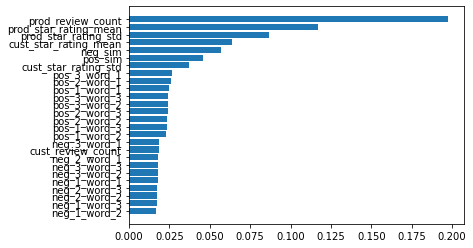

In [98]:
imp_tuples = sorted(zip(map(lambda x: round(x, 4), rf.feature_importances_), 
                 train_x.drop(['customer_id', 'product_parent'], axis=1).columns), reverse=False)
imp = [t[0] for t in imp_tuples]
labl = [t[1] for t in imp_tuples]
plt.barh(labl, imp, linewidth=5)

In [103]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=25, weights='distance')
knn.fit(train_x_norm.drop(['customer_id', 'product_parent'], axis=1), train_y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=25, p=2,
                     weights='distance')

In [104]:
knn.score(test_x_norm.drop(['customer_id', 'product_parent'], axis=1), test_y)

0.5046179680940386

In [105]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(train_x_norm.drop(['customer_id', 'product_parent'], axis=1), train_y)

GaussianNB(priors=None, var_smoothing=1e-09)

In [106]:
gnb.score(test_x_norm.drop(['customer_id', 'product_parent'], axis=1), test_y)

0.6043940666106913

In [64]:
correct = 0
pos_count = 0
star_cor = 0
matrix = [0, 0, 0, 0]
preds = rf.predict(test_x.drop(['customer_id', 'product_parent'], axis=1))
for i, row in test_df.iterrows():
    if (preds[i] > 0):
        pos_count += 1
    if (preds[i] == row.positive):
        star_cor += 1
    if (preds[i] > 0 and row.positive > 0):
        correct += 1
        matrix[0] += 1
    elif (preds[i] <= 0 and row.positive <= 0):
        correct += 1
        matrix[1] += 1
    elif (preds[i] > 0 and row.positive <= 0):
        matrix[2] += 1
    elif (preds[i] <= 0 and row.positive > 0):
        matrix[3] += 1

print('Correct:', correct, correct / len(test_df))
print('Pos:', pos_count, pos_count / len(test_df))
print('Star Correct:', star_cor, star_cor / len(test_df))
print('True Positive:', matrix[0], matrix[0] / len(test_df))
print('True Negative:', matrix[1], matrix[1] / len(test_df))
print('False Positive:', matrix[2], matrix[2] / len(test_df))
print('False Negative:', matrix[3], matrix[3] / len(test_df))

Correct: 6721 0.42443953268077045
Pos: 3928 0.24805809914745816
Star Correct: 6721 0.42443953268077045
True Positive: 3538 0.22342911272497631
True Negative: 3183 0.20101041995579413
False Positive: 390 0.024628986422481843
False Negative: 8724 0.5509314808967477


In [142]:
from keras import models
from keras import layers
from keras import optimizers
from keras.utils import to_categorical
import keras
import numpy as np
import matplotlib.pyplot as plt

In [143]:
keras.backend.clear_session()

In [144]:
nn_train_x = train_x_norm.drop(['customer_id', 'product_parent'], axis=1)
nn_test_x = test_x_norm.drop(['customer_id', 'product_parent'], axis=1)

In [145]:
np.shape(nn_train_x)

(19062, 26)

In [146]:
train_y_cat = to_categorical(train_y)
test_y_cat = to_categorical(test_y)

In [147]:
network = models.Sequential()
network.add(layers.Dense(1024, activation='relu', input_shape=(26,)))
network.add(layers.Dropout(0.5))
network.add(layers.Dense(1024, activation='relu', input_shape=(1024,)))
network.add(layers.Dense(1024, activation='relu', input_shape=(1024,)))
network.add(layers.Dense(512, activation='relu', input_shape=(1024,)))
network.add(layers.Dropout(0.5))
network.add(layers.Dense(512, activation='relu', input_shape=(512,)))
network.add(layers.Dense(512, activation='relu', input_shape=(512,)))
network.add(layers.Dense(256, activation='relu', input_shape=(512,)))
network.add(layers.Dropout(0.5))
network.add(layers.Dense(256, activation='relu', input_shape=(256,)))
network.add(layers.Dense(256, activation='relu', input_shape=(256,)))
network.add(layers.Dense(128, activation='relu', input_shape=(256,)))
network.add(layers.Dropout(0.5))
network.add(layers.Dense(128, activation='relu', input_shape=(128,)))
network.add(layers.Dense(128, activation='relu', input_shape=(128,)))
network.add(layers.Dense(1, activation='sigmoid', input_shape=(128,)))
network.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 1024)              27648     
_________________________________________________________________
dropout_1 (Dropout)          (None, 1024)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 1024)              1049600   
_________________________________________________________________
dense_3 (Dense)              (None, 1024)              1049600   
_________________________________________________________________
dense_4 (Dense)              (None, 512)               524800    
_________________________________________________________________
dropout_2 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 512)              

In [148]:
opt = optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, amsgrad=False)
network.compile(optimizer='rmsprop',
                loss='binary_crossentropy',
                metrics=['accuracy'])

epochs = 500
history = network.fit(nn_train_x, 
                      train_y, 
                      epochs=epochs, 
                      batch_size=128, 
                      validation_data=(nn_test_x, test_y))

Train on 19062 samples, validate on 7146 samples
Epoch 1/500
19062/19062 [==============================] - 2s 87us/step - loss: 0.6331 - accuracy: 0.6470 - val_loss: 197.7960 - val_accuracy: 0.5056
Epoch 2/500
19062/19062 [==============================] - 1s 58us/step - loss: 0.5553 - accuracy: 0.7379 - val_loss: 105.6197 - val_accuracy: 0.5003
Epoch 3/500
19062/19062 [==============================] - 1s 60us/step - loss: 0.5378 - accuracy: 0.7507 - val_loss: 92.3173 - val_accuracy: 0.5000
Epoch 4/500
19062/19062 [==============================] - 1s 56us/step - loss: 0.5300 - accuracy: 0.7523 - val_loss: 79.9236 - val_accuracy: 0.5000
Epoch 5/500
19062/19062 [==============================] - 1s 57us/step - loss: 0.5166 - accuracy: 0.7635 - val_loss: 189.4985 - val_accuracy: 0.5000
Epoch 6/500
19062/19062 [==============================] - 1s 56us/step - loss: 0.5074 - accuracy: 0.7684 - val_loss: 134.7213 - val_accuracy: 0.5000
Epoch 7/500
19062/19062 [============================

19062/19062 [==============================] - 1s 56us/step - loss: 0.4667 - accuracy: 0.7941 - val_loss: 112920.7192 - val_accuracy: 0.4908
Epoch 55/500
19062/19062 [==============================] - 1s 60us/step - loss: 0.4748 - accuracy: 0.7930 - val_loss: 22312.0539 - val_accuracy: 0.5004
Epoch 56/500
19062/19062 [==============================] - 1s 58us/step - loss: 0.4883 - accuracy: 0.7922 - val_loss: 50663.9759 - val_accuracy: 0.4902
Epoch 57/500
19062/19062 [==============================] - 1s 57us/step - loss: 0.4682 - accuracy: 0.7904 - val_loss: 40027.8443 - val_accuracy: 0.4874
Epoch 58/500
19062/19062 [==============================] - 1s 56us/step - loss: 0.4786 - accuracy: 0.7918 - val_loss: 27795.2639 - val_accuracy: 0.4880
Epoch 59/500
19062/19062 [==============================] - 1s 57us/step - loss: 0.4715 - accuracy: 0.7933 - val_loss: 66334.6293 - val_accuracy: 0.4915
Epoch 60/500
19062/19062 [==============================] - 1s 56us/step - loss: 0.4698 - accu

19062/19062 [==============================] - 1s 53us/step - loss: 0.6922 - accuracy: 0.7980 - val_loss: 260862.0169 - val_accuracy: 0.4993
Epoch 108/500
19062/19062 [==============================] - 1s 53us/step - loss: 0.4643 - accuracy: 0.7990 - val_loss: 1072207.8466 - val_accuracy: 0.4999
Epoch 109/500
19062/19062 [==============================] - 1s 53us/step - loss: 0.5088 - accuracy: 0.7986 - val_loss: 247775.7063 - val_accuracy: 0.5001
Epoch 110/500
19062/19062 [==============================] - 1s 53us/step - loss: 0.4774 - accuracy: 0.7981 - val_loss: 325259.2765 - val_accuracy: 0.4959
Epoch 111/500
19062/19062 [==============================] - 1s 54us/step - loss: 0.4739 - accuracy: 0.7995 - val_loss: 187586.8417 - val_accuracy: 0.4994
Epoch 112/500
19062/19062 [==============================] - 1s 53us/step - loss: 0.4650 - accuracy: 0.7969 - val_loss: 158848.1717 - val_accuracy: 0.4999
Epoch 113/500
19062/19062 [==============================] - 1s 53us/step - loss: 0

Epoch 160/500
19062/19062 [==============================] - 1s 53us/step - loss: 0.4822 - accuracy: 0.7979 - val_loss: 128382.1288 - val_accuracy: 0.5001
Epoch 161/500
19062/19062 [==============================] - 1s 55us/step - loss: 0.4842 - accuracy: 0.7871 - val_loss: 70556.6499 - val_accuracy: 0.5001
Epoch 162/500
19062/19062 [==============================] - 1s 58us/step - loss: 0.7448 - accuracy: 0.8025 - val_loss: 90243.3971 - val_accuracy: 0.5001
Epoch 163/500
19062/19062 [==============================] - 1s 59us/step - loss: 0.4877 - accuracy: 0.7995 - val_loss: 138786.6633 - val_accuracy: 0.5001
Epoch 164/500
19062/19062 [==============================] - 1s 56us/step - loss: 0.8843 - accuracy: 0.7996 - val_loss: 413481.4429 - val_accuracy: 0.5001
Epoch 165/500
19062/19062 [==============================] - 1s 57us/step - loss: 0.4882 - accuracy: 0.8021 - val_loss: 159672.9523 - val_accuracy: 0.5001
Epoch 166/500
19062/19062 [==============================] - 1s 55us/ste

19062/19062 [==============================] - 1s 53us/step - loss: 0.5554 - accuracy: 0.8013 - val_loss: 32536.9157 - val_accuracy: 0.5000
Epoch 214/500
19062/19062 [==============================] - 1s 53us/step - loss: 0.5082 - accuracy: 0.8053 - val_loss: 14462.0574 - val_accuracy: 0.5007
Epoch 215/500
19062/19062 [==============================] - 1s 53us/step - loss: 0.5423 - accuracy: 0.8018 - val_loss: 99055.7851 - val_accuracy: 0.4351
Epoch 216/500
19062/19062 [==============================] - 1s 54us/step - loss: 0.4667 - accuracy: 0.8035 - val_loss: 33903.9440 - val_accuracy: 0.6082
Epoch 217/500
19062/19062 [==============================] - 1s 53us/step - loss: 0.7462 - accuracy: 0.8031 - val_loss: 74187.1367 - val_accuracy: 0.5000
Epoch 218/500
19062/19062 [==============================] - 1s 54us/step - loss: 0.4547 - accuracy: 0.8050 - val_loss: 5558.6619 - val_accuracy: 0.5000
Epoch 219/500
19062/19062 [==============================] - 1s 54us/step - loss: 2.5376 - 

19062/19062 [==============================] - 1s 61us/step - loss: 0.4611 - accuracy: 0.8046 - val_loss: 40140.9102 - val_accuracy: 0.5000
Epoch 267/500
19062/19062 [==============================] - 1s 55us/step - loss: 0.4617 - accuracy: 0.8058 - val_loss: 5091.5350 - val_accuracy: 0.5000
Epoch 268/500
19062/19062 [==============================] - 1s 52us/step - loss: 0.4544 - accuracy: 0.8087 - val_loss: 38175.1784 - val_accuracy: 0.5000
Epoch 269/500
19062/19062 [==============================] - 1s 53us/step - loss: 0.4536 - accuracy: 0.8062 - val_loss: 9961.1826 - val_accuracy: 0.5000
Epoch 270/500
19062/19062 [==============================] - 1s 52us/step - loss: 0.5184 - accuracy: 0.8085 - val_loss: 62186.2840 - val_accuracy: 0.5000
Epoch 271/500
19062/19062 [==============================] - 1s 54us/step - loss: 0.4852 - accuracy: 0.8043 - val_loss: 42368.2399 - val_accuracy: 0.5000
Epoch 272/500
19062/19062 [==============================] - 1s 58us/step - loss: 3.4426 - a

19062/19062 [==============================] - 1s 53us/step - loss: 0.4507 - accuracy: 0.8075 - val_loss: 15490.5674 - val_accuracy: 0.5000
Epoch 320/500
19062/19062 [==============================] - 1s 53us/step - loss: 0.4581 - accuracy: 0.8074 - val_loss: 8355.5938 - val_accuracy: 0.5000
Epoch 321/500
19062/19062 [==============================] - 1s 53us/step - loss: 0.5241 - accuracy: 0.8090 - val_loss: 11371.8407 - val_accuracy: 0.5000
Epoch 322/500
19062/19062 [==============================] - 1s 54us/step - loss: 0.4958 - accuracy: 0.8068 - val_loss: 2848.4677 - val_accuracy: 0.5000
Epoch 323/500
19062/19062 [==============================] - 1s 53us/step - loss: 0.4902 - accuracy: 0.8090 - val_loss: 1.1396 - val_accuracy: 0.5000
Epoch 324/500
19062/19062 [==============================] - 1s 54us/step - loss: 0.4712 - accuracy: 0.8044 - val_loss: 1.1424 - val_accuracy: 0.5000
Epoch 325/500
19062/19062 [==============================] - 1s 53us/step - loss: 0.4507 - accuracy:

19062/19062 [==============================] - 1s 56us/step - loss: 0.4766 - accuracy: 0.8101 - val_loss: 10.4156 - val_accuracy: 0.5000
Epoch 374/500
19062/19062 [==============================] - 1s 58us/step - loss: 0.4891 - accuracy: 0.8106 - val_loss: 1.1607 - val_accuracy: 0.5000
Epoch 375/500
19062/19062 [==============================] - 1s 55us/step - loss: 0.4575 - accuracy: 0.8100 - val_loss: 205438.4209 - val_accuracy: 0.5000
Epoch 376/500
19062/19062 [==============================] - 1s 55us/step - loss: 0.4623 - accuracy: 0.8057 - val_loss: 473284.2791 - val_accuracy: 0.5000
Epoch 377/500
19062/19062 [==============================] - 1s 58us/step - loss: 0.4605 - accuracy: 0.8103 - val_loss: 1.1582 - val_accuracy: 0.5000
Epoch 378/500
19062/19062 [==============================] - 1s 56us/step - loss: 0.4484 - accuracy: 0.8117 - val_loss: 86539.5731 - val_accuracy: 0.5000
Epoch 379/500
19062/19062 [==============================] - 1s 56us/step - loss: 0.4638 - accuracy

Epoch 427/500
19062/19062 [==============================] - 1s 57us/step - loss: 0.4615 - accuracy: 0.8084 - val_loss: 0.8523 - val_accuracy: 0.6488
Epoch 428/500
19062/19062 [==============================] - 1s 57us/step - loss: 0.4597 - accuracy: 0.8118 - val_loss: 5.1039 - val_accuracy: 0.5000
Epoch 429/500
19062/19062 [==============================] - 1s 56us/step - loss: 0.8822 - accuracy: 0.8119 - val_loss: 55343.0523 - val_accuracy: 0.5000
Epoch 430/500
19062/19062 [==============================] - 1s 55us/step - loss: 0.6891 - accuracy: 0.8107 - val_loss: 621291.7275 - val_accuracy: 0.5000
Epoch 431/500
19062/19062 [==============================] - 1s 55us/step - loss: 0.5446 - accuracy: 0.8128 - val_loss: 2190.6708 - val_accuracy: 0.5000
Epoch 432/500
19062/19062 [==============================] - 1s 54us/step - loss: 0.4898 - accuracy: 0.8125 - val_loss: 46824.6727 - val_accuracy: 0.5000
Epoch 433/500
19062/19062 [==============================] - 1s 57us/step - loss: 15

Epoch 481/500
19062/19062 [==============================] - 1s 53us/step - loss: 0.4972 - accuracy: 0.8112 - val_loss: 66238.0429 - val_accuracy: 0.5000
Epoch 482/500
19062/19062 [==============================] - 1s 53us/step - loss: 0.4901 - accuracy: 0.8091 - val_loss: 1.0837 - val_accuracy: 0.5000
Epoch 483/500
19062/19062 [==============================] - 1s 53us/step - loss: 0.4580 - accuracy: 0.8096 - val_loss: 18545.5917 - val_accuracy: 0.5000
Epoch 484/500
19062/19062 [==============================] - 1s 54us/step - loss: 2.9993 - accuracy: 0.8147 - val_loss: 10824.4452 - val_accuracy: 0.5000
Epoch 485/500
19062/19062 [==============================] - 1s 53us/step - loss: 0.5128 - accuracy: 0.8110 - val_loss: 3729.1897 - val_accuracy: 0.5000
Epoch 486/500
19062/19062 [==============================] - 1s 53us/step - loss: 0.4987 - accuracy: 0.8103 - val_loss: 1.1512 - val_accuracy: 0.5017
Epoch 487/500
19062/19062 [==============================] - 1s 53us/step - loss: 2.0

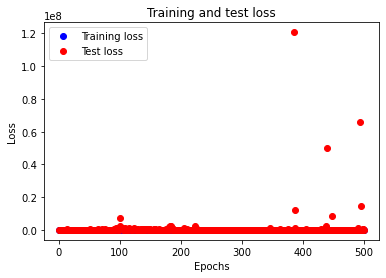

In [149]:
history_dict = history.history
loss_values = history_dict['loss']
test_loss_values = history_dict['val_loss']
epochs_range = range(1, epochs + 1)
plt.plot(epochs_range, loss_values, 'bo', label='Training loss')
plt.plot(epochs_range, test_loss_values, 'ro', label='Test loss')
plt.title('Training and test loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

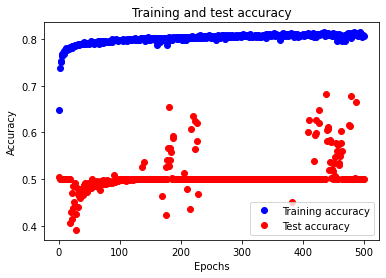

In [150]:
acc_values = history_dict['accuracy']
test_acc_values = history_dict['val_accuracy']
plt.plot(epochs_range, acc_values, 'bo', label='Training accuracy')
plt.plot(epochs_range, test_acc_values, 'ro', label='Test accuracy')
plt.title('Training and test accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [151]:
correct = 0
pos_count = 0
star_cor = 0
matrix = [0, 0, 0, 0]
preds = network.predict(nn_test_x)
for i in range(len(preds)):
    if (preds[i] > 0.5):
        pos_count += 1
    if (preds[i] == test_y.iloc[i]):
        star_cor += 1
    if (preds[i] > 0.5 and test_y.iloc[i] > 0.5):
        correct += 1
        matrix[0] += 1
    elif (preds[i] <= 0.5 and test_y.iloc[i] <= 0.5):
        correct += 1
        matrix[1] += 1
    elif (preds[i] > 0.5 and test_y.iloc[i] <= 0.5):
        matrix[2] += 1
    elif (preds[i] <= 0.5 and test_y.iloc[i] > 0.5):
        matrix[3] += 1

print('Correct:', correct, correct / len(test_df))
print('Pos:', pos_count, pos_count / len(test_df))
print('Star Correct:', star_cor, star_cor / len(test_df))
print('True Positive:', matrix[0], matrix[0] / len(test_df))
print('True Negative:', matrix[1], matrix[1] / len(test_df))
print('False Positive:', matrix[2], matrix[2] / len(test_df))
print('False Negative:', matrix[3], matrix[3] / len(test_df))

Correct: 3573 0.5
Pos: 0 0.0
Star Correct: 3573 0.5
True Positive: 0 0.0
True Negative: 3573 0.5
False Positive: 0 0.0
False Negative: 3573 0.5


In [ ]:
#network.save('basic_neural_net3.h5')